![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

[Source: Divvy Bikes](https://divvybikes.com/system-data)

### 🌎 **Some guiding questions to help you explore this data:**
1. How many observations are in the dataset? Are there null values? 
2. How would you clean and prepare the data for analysis?
3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.
4. Time check! What are the peak and off-peak riding times during the day?

### 📊 **Visualization ideas**
- Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.
- Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.
- Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [91]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# read dataset
divvy_df = pd.read_csv("202307-divvy-tripdata.csv")
divvy_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656944,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [93]:
# check information of our dataset like number of rows, cols, dtypes
divvy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


In [94]:
# change data types from object to datetime 
divvy_df[["started_at","ended_at"]] = divvy_df[["started_at","ended_at"]].apply(pd.to_datetime)

In [95]:
# create new column of duration
divvy_df["duration_min"] = (divvy_df["ended_at"]-divvy_df["started_at"]).astype('timedelta64[m]')

In [96]:
# create new column of hour when ride started
divvy_df["started_hour"] = divvy_df["started_at"].dt.hour

In [97]:
# create new of week days when rides were started
divvy_df["started_day"] = divvy_df["started_at"].dt.day_name()

In [98]:
# check if data contains null values
divvy_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
start_station_id      122943
end_station_name      130304
end_station_id        130304
start_lat                  0
start_lng                  0
end_lat                 1254
end_lng                 1254
member_casual              0
duration_min               0
started_hour               0
started_day                0
dtype: int64

In [99]:
# calclute five percent of length
threshold = len(divvy_df)*.05
threshold

38382.5

In [100]:
# find columns that have sum of null values less then threshold
cols_to_drop = divvy_df.columns[divvy_df.isnull().sum()<=threshold]
# drop rows for filtered columns
divvy_df.dropna(subset=cols_to_drop,inplace=True)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'duration_min',
       'started_hour', 'started_day'],
      dtype='object')

Question: Which Types of Rides are mostly taken by people?

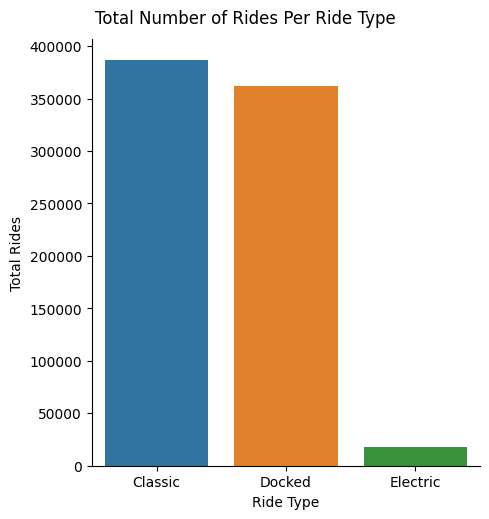

In [104]:
# create a count plot for rideable_type
g = sns.catplot(x="rideable_type",
            data=divvy_df,
            kind="count",
            )
# set figure title
g.fig.suptitle("Total Number of Rides Per Ride Type",
               y=1.03)
# set xlabel and ylabel
g.set(xlabel="Ride Type",
      ylabel = "Total Rides")
# change x ticks
plt.xticks([0,1,2],["Classic","Docked","Electric"])

# show plot
plt.show()

In [105]:
#group member_casual and rideable_type and count the rides
ridetype_compar = divvy_df.groupby(["member_casual","rideable_type"], as_index=False)[["ride_id"]].count().rename(columns = {"ride_id":"total_rides"})
ridetype_compar

,member_casual,rideable_type,total_rides
0,casual,classic_bike,142366
1,casual,docked_bike,17830
2,casual,electric_bike,170052
3,member,classic_bike,219104
4,member,electric_bike,217044


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


[]

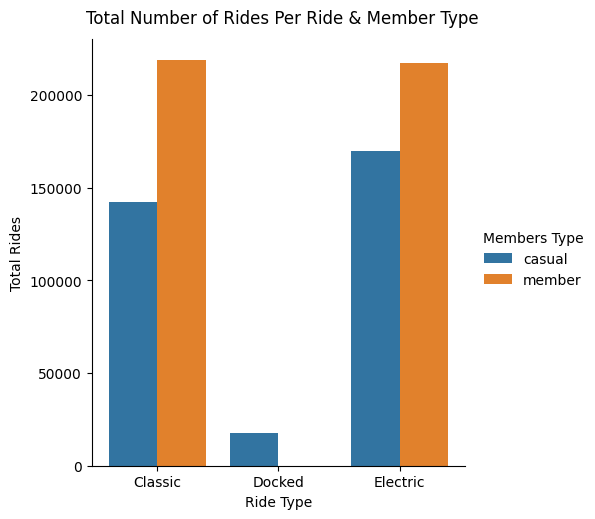

In [106]:
# plot total number of rides per ride type and member type
g = sns.catplot(x="rideable_type", 
            y="total_rides",
            data=ridetype_compar,
            kind="bar",
            ci=None,
            hue="member_casual")

# set title
g.fig.suptitle("Total Number of Rides Per Ride & Member Type",
               y=1.03)
# change legent title
g.legend.set_title("Members Type")
# change xlabel and ylabel
g.set(xlabel="Ride Type",
      ylabel = "Total Rides")
# change x ticks
plt.xticks([0,1,2],["Classic","Docked","Electric"])


plt.plot()

In [108]:
# group by ride day and hour and find total rides
ride_times_df = divvy_df.groupby(["started_day","started_hour"],as_index=False)[["ride_id"]].count()
ride_times_df

,started_day,started_hour,ride_id
0,Friday,0,1222
1,Friday,1,699
2,Friday,2,327
3,Friday,3,215
4,Friday,4,199
...,...,...,...
163,Wednesday,19,4841
164,Wednesday,20,4037
165,Wednesday,21,3157
166,Wednesday,22,2545


In [113]:
# change started hour values to column names 
ride_times_df = pd.crosstab(ride_times_df["started_day"], ride_times_df["started_hour"],values=ride_times_df["ride_id"], aggfunc="mean")
ride_times_df

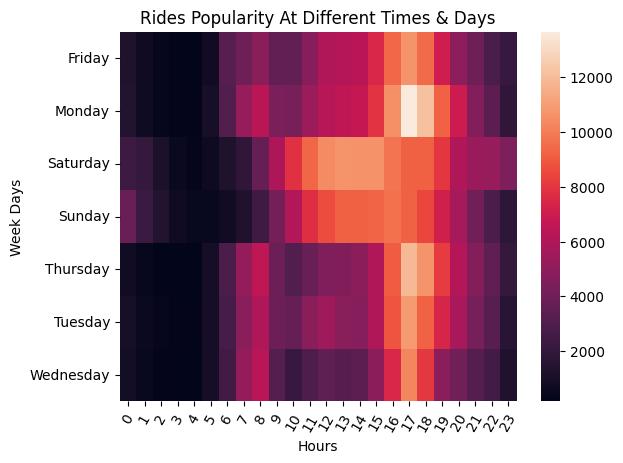

In [124]:
# draw heatmap to show peak hours and off peak hours
g = sns.heatmap(ride_times_df)
# set title
plt.title("Rides Popularity At Different Times & Days")
#set labels
g.set(xlabel="Hours",
      ylabel="Week Days")
# rotate x ticks to 60 degree
plt.xticks(rotation=60)
# show plot
plt.show()